In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("/content/glass.xlsx", sheet_name='glass')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
df.dtypes

,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
for col in df.select_dtypes(include='number').columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df[col] = df[col].where((df[col] >= lower) & (df[col] <= upper))


In [ ]:
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,NaN,72.61,0.08,9.18,NaN,0.0,NaN
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,NaN,0.0,NaN
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,NaN,0.0,NaN
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,NaN,0.0,NaN


In [ ]:
for col in df.columns:
  df[col]=df[col].fillna(df[col].mean())

In [ ]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.0,214.000000,214.000000
mean,1.517899,13.433092,2.684533,1.385867,72.700050,0.410338,8.650532,0.0,0.041139,2.118919
std,0.001876,0.662013,1.442408,0.337939,0.535357,0.257837,0.586890,0.0,0.070725,1.273389
min,1.512990,11.560000,0.000000,0.560000,71.150000,0.000000,6.930000,0.0,0.000000,1.000000
25%,1.516558,12.962500,2.115000,1.202500,72.380000,0.122500,8.285000,0.0,0.000000,1.000000
50%,1.517720,13.330000,3.480000,1.385867,72.760000,0.540000,8.645000,0.0,0.000000,2.000000
75%,1.518503,13.797500,3.600000,1.560000,73.067500,0.600000,8.890000,0.0,0.067500,2.118919
max,1.523000,15.150000,4.490000,2.270000,73.880000,1.100000,10.560000,0.0,0.250000,6.000000


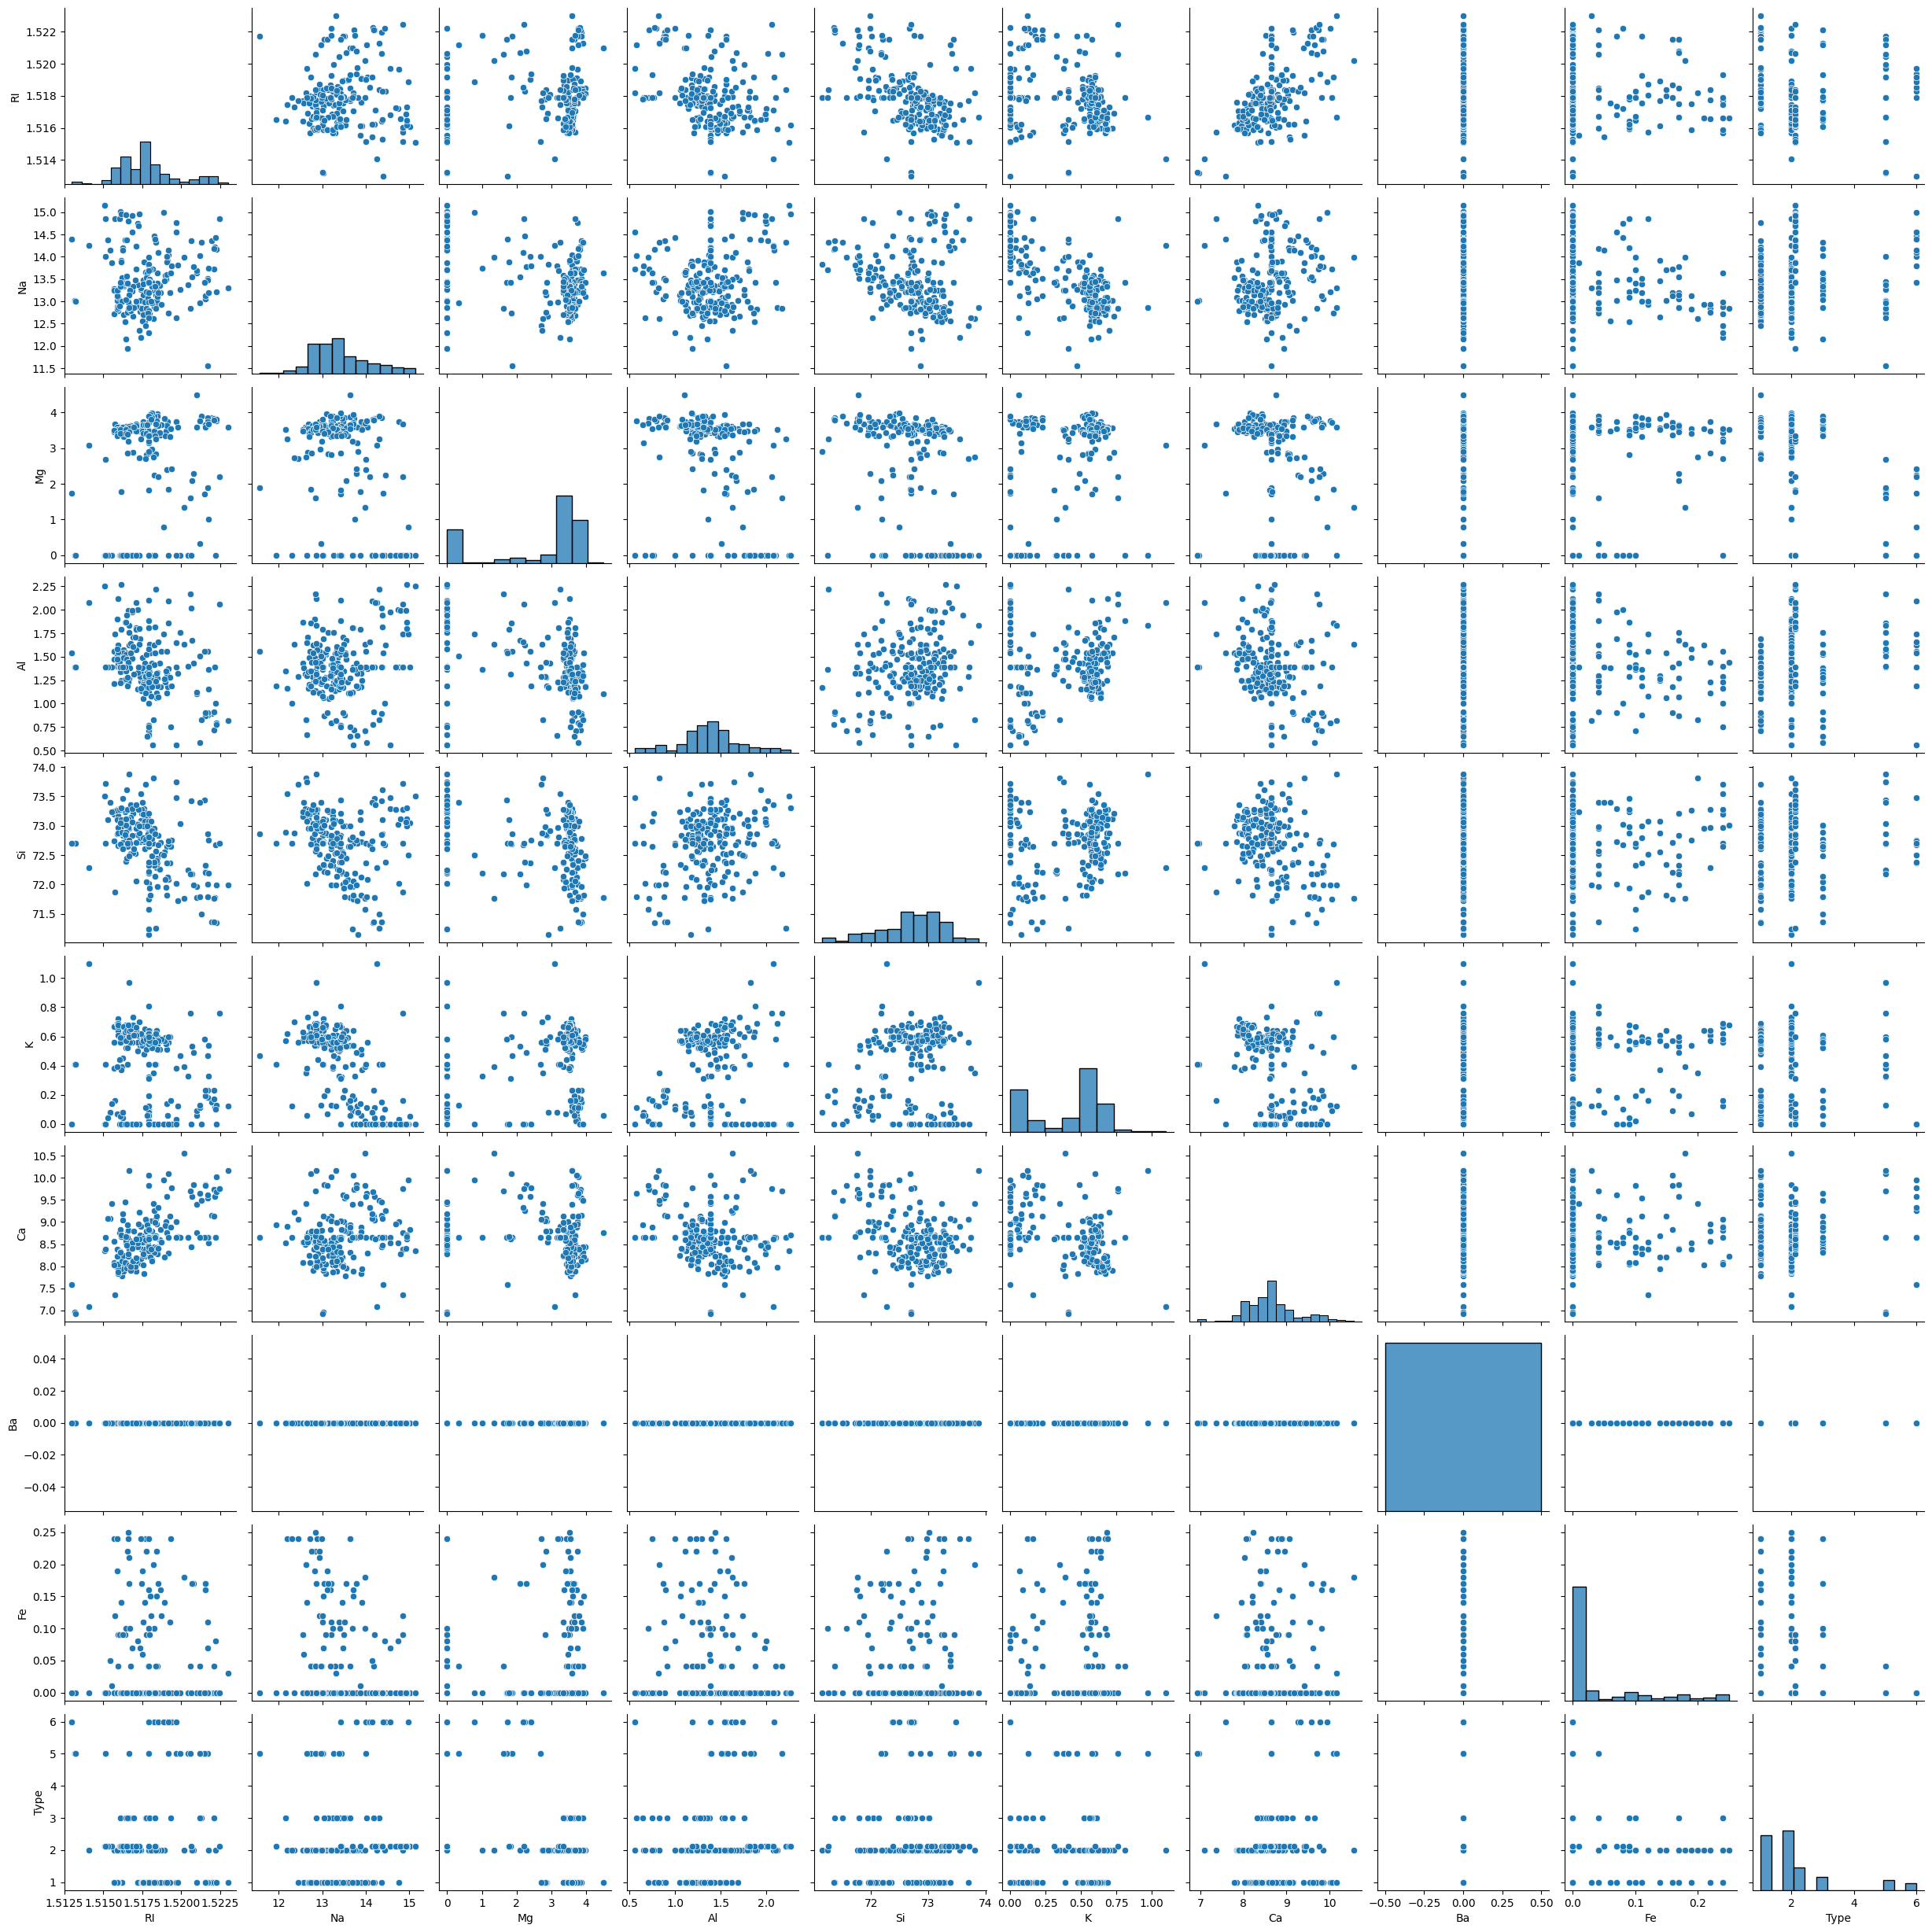

In [ ]:
sns.pairplot(df)

In [ ]:
X=df.drop('Type',axis=1)
Y=df['Type']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scaled=sc.fit_transform(X)


In [ ]:
scaled_df = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), Y], axis=1)

In [ ]:
scaled_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.662241,0.313277,1.254639,-8.478981e-01,-1.722602,-1.361942,0.169881,0.0,-0.583032,1.000000
1,-0.154140,0.691798,0.636168,-7.672396e-02,0.056076,0.270811,-1.401379,0.0,-0.583032,1.000000
2,-0.918089,0.146727,0.601422,4.571658e-01,0.542872,-0.079065,-1.486774,0.0,-0.583032,1.000000
3,-0.127429,-0.337780,0.698710,-2.843478e-01,-0.168599,0.620686,-0.735302,0.0,-0.583032,1.000000
4,-0.255644,-0.246935,0.650066,-4.326505e-01,0.711378,0.542936,-0.991485,0.0,-0.583032,1.000000
...,...,...,...,...,...,...,...,...,...,...
209,-0.891377,1.070320,-1.865511,6.585964e-16,-0.168599,-1.284191,0.904274,0.0,-0.583032,2.118919
210,-0.560155,2.251307,-1.865511,1.791890e+00,0.673933,-1.595192,-0.427881,0.0,-0.583032,2.118919
211,1.469918,1.403419,-1.865511,1.880872e+00,1.347958,-1.595192,-0.359566,0.0,-0.583032,2.118919
212,-0.741793,1.433701,-1.865511,1.643588e+00,1.703693,-1.595192,-0.291250,0.0,-0.583032,2.118919


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(171, 9) (43, 9) (171,) (43,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert the target variable back to integer type
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
print("Accuracy: ", accuracy_score(Y_test, Y_pred))
print("Precision: ", precision_score(Y_test, Y_pred, average='weighted'))
print("Recall: ", recall_score(Y_test, Y_pred, average='weighted'))
print("F1 Score: ", f1_score(Y_test, Y_pred, average='weighted'))

Accuracy:  0.8372093023255814
Precision:  0.8599114064230344
Recall:  0.8372093023255814
F1 Score:  0.8195117723530262


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(Y_test, rf_pred)
rf_accuracy

0.8372093023255814

In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, Y_train)
gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(Y_test, gb_pred)
gb_accuracy


0.7906976744186046

Explain Bagging and Boosting methods. How is it different from each other.

Bagging builds multiple independent models (usually decision trees) on random subsets of the training data (with replacement), and then averages the predictions (for regression) or votes (for classification).


Boosting builds models sequentially, where each new model focuses on correcting the errors made by the previous one. It gives more weight to wrong predictions and combines all models in a weighted way.

Explain how to handle imbalance in the data.


 Why It's a Problem:
A model might show high accuracy by always predicting the majority class.

But precision, recall, or F1-score will be poor for the minority class.


1. Resampling Techniques

 a. Oversampling (Minority Class)
Duplicate or synthetically generate more samples from the minority class.

b. Undersampling (Majority Class)
Randomly remove samples from the majority class.

Method: RandomUnderSampler

2. Use Class Weights
Penalize misclassification of the minority class more heavily.

3. Change Evaluation Metrics
Use metrics that account for imbalance:

Precision

Recall

F1-Score

ROC AUC Score
